In [16]:

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys
from pathlib import Path

# in jupyter (lab / notebook), based on notebook path
module_path = str(Path.cwd().parents[0] / "src")
# in standard python

if module_path not in sys.path:
    sys.path.append(module_path)



In [22]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [23]:
import data_processing as dp
import raw_query

In [24]:
# pip install sklearn
connector = dp.establish_connection()

Initiating login request with your identity provider. A browser window should have opened for you to complete the login. If you can't see it, check existing browser windows, or your OS settings. Press CTRL+C to abort and try again...
Going to open: https://newrelic.okta.com/app/snowflake/exkugjs4xeGHw0Vo10x7/sso/saml?SAMLRequest=lVJdb%2BIwEPwrke85sRPSLwuoKLSARAsHlKvuzSQL9ZHYOa9D0n9fh49T76RWujdrPbMzu7Pt2zrPvD0YlFp1SBgw4oFKdCrVtkOelw%2F%2BNfHQCpWKTCvokDdActtto8izgvdK%2B6rm8LsEtJ5rpJA3Hx1SGsW1QIlciRyQ24Qveo8THgWMC0Qw1smREyVF6bRerS04pVVVBVUr0GZLI8YYZTfUoRrIN%2FJBovhaozDa6kRnZ0rtZvpEIqQsbiQcwinMTsQ7qY4r%2BEplfQQhHy2XM382XSyJ1ztP19cKyxzMAsxeJvA8nxwNoHOgoDKQycRZ8FNhhcYAla42mdhBovOitK5t4F50AynN9Fa6ZY0HHVLsZLpaT1p7pl4er%2B%2Fil81wN4T7NRTTp%2FtJWalk%2Fv2y%2F2OUTm%2FiuIoT4q3O0UZNtGPEEsaqCdS6EosufNbyI7ZkMQ8veRgGF9HVT%2BINXKBSCXtg%2Fus60DsrDu5EUdA%2FxinUu3L7C%2BMahqOKrXTI6iuKqGkTGDneDD84MN3%2F3kSbfqSf7u%2FJRTIezLRr8OY9aJML%2B3liYRAeKjL1Nwcoh1zIrJemBhBdclmmq74BYd2ZW1MCod2j6t%2BH3n0H&RelayState=ver%3

In [25]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [26]:
## fetching last 1 year data
df = dp.fetch_data(raw_query.query(),connector)

In [28]:
df.head()

,CREATED_DATE,CASE_NUMBER,CASE_ID,STATUS,QUEUE,SUPPORT_QUEUE,PRODUCT_FEATURE,ADDITIONAL_SKILL_REQUIRED,PRODUCT_FEATURE_GROUP,ENGINEERING_GROUP,ENGINEERING_GROUP_LEAD,ORIGIN,SF_ACCOUNT_ID,SF_ACCOUNT_NAME,SF_ACCOUNT_FAMILY_ARR,CUSTOMER_PREFERRED_TIMEZONE_REGION,CUSTOMER_REGION,CUSTOMER_CONTACT_ID,CUSTOMER_CONTACT_NAME,CUSTOMER_CONTACT_EMAIL,PRIORITY,SEVERITY,SEVERITY_REASON_C,SUBJECT,SUPPORT_TIER,SUPPORT_TIER_GROUP,DESCRIPTION,ELIGIBLE_FOR_ESCALATION,IS_ESCALATED,ESCALATED_DATE,ESCALATION_REASON,CRITICAL_REASON,CASE_OWNER_ID,CASE_OWNER_NAME,CASE_OWNER_EMAIL,CASE_OWNER_TITLE,CASE_OWNER_MANAGER,CASE_OWNER_MANAGER_EMAIL,CASE_OWNER_MANAGER_TITLE,TSM,SUPPORT_ENTITLEMENT_NAME,SUBMITTER_ID,SUBMITTER_NAME,SUBMITTER_EMAIL,PARENT_CASE_ID,FEATURE_REQUEST_AHA_ID,DRIVER,DRIVER_CATEGORY,RCA_REQUESTED,CUSTOMER_RCA,JAPAN_KK_ACCOUNT,KEEP_TICKET_INTERNAL,PERMALINK,RPM_ACCOUNT_ID,SOLVED_DATE,SOLVED_DATE_TIME,UPBOARD_INCIDENT_ID,INCIDENT_CASE_C,SLA_MET,SLA_MISSED,INITIAL_RESPONSE_IN_HRS,FIRST_RESPONSE_MET,FIRST_RESPONSE_VIOLATED,MILESTONE_COMPLETED,MILESTONE_VIOLATED,TARGET_RESPONSE_IN_MINS,TARGET_RESPONSE_IN_HRS,HOURS_MISSED_BY,GTSE,BUG_GTSE,DAYS_TO_SOLVED_DATE_TIME,TIME_ZONE_C,CASE_SWARM,SLA_TARGET_DT,PRODUCT_FEATURE_AT_SLA_BREACH,CASE_OWNER_AT_SLA_BREACH,CASE_OWNER_MANAGER_ID_AT_SLA_BREACH,CASE_OWNER_MANAGER_AT_SLA_BREACH,SLA_OWNER_ID,SLA_OWNER,SLA_OWNER_EMAIL,SLA_OWNER_MANAGER_ID,SLA_OWNER_MANAGER,SLA_OWNER_MANAGER_TSM,FIRST_SCXM_TEAM_USER_ID_C,SOFT_POKE_1,SOFT_POKE_2,SOFT_POKE_FINAL,TOTAL_SOFT_POKES,SURVEY_ID,CSAT_SURVEY_CREATED_DATE,CSAT_SCORE,CSAT_SCORE_STRING,CSAT_TEXT,SERVICE_SAT_SCORE,SERVICE_SAT_SCORE_STRING,CUSTOMER_SERVICE_SAT_SCORE,CUSTOMER_SERVICE_SAT_SCORE_STRING,CUSTOMER_EFFORT_SCORE,CUSTOMER_EFFORT_SCORE_STRING,PRODUCT_SAT_SCORE,PRODUCT_SAT_SCORE_STRING,TTR_SAT_SCORE,TTR_SAT_SCORE_STRING,TECH_KNOWLEDGE_SAT_SCORE,TECH_KNOWLEDGE_SAT_SCORE_STRING,PROBLEM_SOLVED_SCORE
0,2025-03-20 04:01:24+00:00,00255045,500Ph00000WIBKOIA5,New,Alert,1,Alerts,None,None,AIOps,Amir Jakoby,In-Product Support,0011U00001S8rrOQAR,CoinSwitch,214528.0000000000,APJ,APAC,0038W00001XFD1ZQAX,Sahil Tewari,dev@coinswitch.co,P2,High,None,Singal Lost false alert,Pro,Pro,"Hi Team,\n\nWe received a Signal lost alert ye...",False,False,NaT,None,None,00G1U000003jtG7UAI,None,None,None,None,None,None,0,3112818 NR One - Pro Support,0051U000009HhKkQAK,Service Cloud Integration User,sfdcadmin@newrelic.com,None,None,None,None,False,None,False,False,None,3112818,None,NaT,None,None,0,0,NaN,NaT,NaT,False,False,360.0,6.0,00:00,0,0,None,Asia/Calcutta UTC +05:30,False,2025-03-20 10:01:00+00:00,Alerts,TDP/AI - Alerts,None,None,None,None,None,None,None,0,None,0,0,0,0,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None
1,2025-03-20 03:58:51+00:00,00255044,500Ph00000WIHRNIA5,New,CloudInt,1,Cloud Integrations,None,None,"ICS (Instrumentation, Cloud Integrations & Sec...",Prabhu Nakkeeran,In-Product Support,None,None,None,APJ,None,003Ph00000VOYRhIAP,Benjamin Hennessy,benjamin.hennessy@xero.com,P3,Normal,None,Transit gateway attachment metrics,Enterprise,Enterprise,Since migrating from metric polling to metric ...,False,False,NaT,None,None,00G1U000003jtGEUAY,None,None,None,None,None,None,0,2990187 NR One - Enterprise Support,0051U000009HhKkQAK,Service Cloud Integration User,sfdcadmin@newrelic.com,None,None,None,None,False,None,False,False,https://onenr.io/0Bj3eo06ZwX,6458451,None,NaT,None,None,0,0,NaN,NaT,NaT,False,False,480.0,8.0,00:00,0,0,None,Australia/Melbourne UTC +11:00,False,2025-03-20 11:58:00+00:00,Cloud Integrations,FSO: Arch - Cloud Integrations,None,None,None,None,None,None,None,0,0051U000007i5A1QAI,0,0,0,0,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,None
2,2025-03-20 03:17:13+00:00,00255042,500Ph00000WIBc5IAH,New,Act,1,Accounts,None,None,Growth & Observability,Kranthi Erusu,In-Product Support,0011U00001S8ZF9QAN,Infomedia Limited,361176.0000000000,APJ,APAC,003Ph00000BV6FlIAL,Tim Farr,tfarr@infomedia.com.au,P2,High,N

In [29]:
df.shape

(35218, 107)

In [30]:
df.columns

Index(['CREATED_DATE', 'CASE_NUMBER', 'CASE_ID', 'STATUS', 'QUEUE',
       'SUPPORT_QUEUE', 'PRODUCT_FEATURE', 'ADDITIONAL_SKILL_REQUIRED',
       'PRODUCT_FEATURE_GROUP', 'ENGINEERING_GROUP',
       ...
       'CUSTOMER_SERVICE_SAT_SCORE_STRING', 'CUSTOMER_EFFORT_SCORE',
       'CUSTOMER_EFFORT_SCORE_STRING', 'PRODUCT_SAT_SCORE',
       'PRODUCT_SAT_SCORE_STRING', 'TTR_SAT_SCORE', 'TTR_SAT_SCORE_STRING',
       'TECH_KNOWLEDGE_SAT_SCORE', 'TECH_KNOWLEDGE_SAT_SCORE_STRING',
       'PROBLEM_SOLVED_SCORE'],
      dtype='object', length=107)

In [31]:
df.dtypes

CREATED_DATE                       datetime64[ns, Etc/UTC]
CASE_NUMBER                                         object
CASE_ID                                             object
STATUS                                              object
QUEUE                                               object
                                            ...           
TTR_SAT_SCORE                                      float64
TTR_SAT_SCORE_STRING                                object
TECH_KNOWLEDGE_SAT_SCORE                           float64
TECH_KNOWLEDGE_SAT_SCORE_STRING                     object
PROBLEM_SOLVED_SCORE                                object
Length: 107, dtype: object

In [32]:
df['PRIORITY'].unique()

array(['P2', 'P3', 'P4', 'P1', 'None'], dtype=object)

In [33]:
df['RPM_ACCOUNT_ID'].nunique()

9212

In [35]:
df['SEVERITY'].unique()

array(['Normal', 'High', 'Critical', 'Low'], dtype=object)

In [37]:
df.groupby(by='CASE_NUMBER').agg(CASE_ID=('CASE_ID', 'count'))

,CASE_ID
CASE_NUMBER,
00193393,1
00193394,1
00193395,1
00193396,1
00193398,1
...,...
00254891,1
00254892,1
00254893,1


In [38]:
df.groupby(by='CASE_ID').agg(CASE_ID=('CASE_NUMBER', 'count'))

,CASE_ID
CASE_ID,
500Ph000008TBI4IAO,1
500Ph000008TTWkIAO,1
500Ph000008TTrgIAG,1
500Ph000008TUiwIAG,1
500Ph000008TWRNIA4,1
...,...
500Ph00000WCbfiIAD,1
500Ph00000WCbkYIAT,1
500Ph00000WCciDIAT,1


In [47]:
df['SF_ACCOUNT_NAME'].nunique()

4248

In [48]:
df['RPM_ACCOUNT_ID'].nunique()

9204

In [50]:
# Step 1: Group by RPM_ACCOUNT_ID and count the number of unique SF_ACCOUNT_NAMEs
unique_sf_counts = df.groupby('RPM_ACCOUNT_ID').agg(UNIQUE_SF_NAMES=('SF_ACCOUNT_NAME', 'nunique'))

# Step 2: Filter RPM_ACCOUNT_IDs with more than one unique SF_ACCOUNT_NAME
rpm_accounts_multiple_sf = unique_sf_counts[unique_sf_counts['UNIQUE_SF_NAMES'] > 1].index

# Step 3: Use the filtered RPM_ACCOUNT_IDs to get the SF_ACCOUNT_NAMEs
sf_account_names_for_multiple_rpm = df[df['RPM_ACCOUNT_ID'].isin(rpm_accounts_multiple_sf)][['RPM_ACCOUNT_ID', 'SF_ACCOUNT_NAME']]

# print(sf_account_names_for_multiple_rpm)

In [54]:
sf_account_names_for_multiple_rpm.sort_values(by = 'RPM_ACCOUNT_ID').head(50)

,RPM_ACCOUNT_ID,SF_ACCOUNT_NAME
12077,1135888,Verizon Communications Inc
34891,1135888,Verizon
5511,1135888,Verizon Communications Inc
27338,1135888,Verizon
33018,1135888,Verizon
2487,1135888,Verizon Communications Inc
32851,1135888,Verizon
18791,1135888,Verizon
13687,1135888,Verizon Communications Inc
7807,1135888,Verizon Communications Inc


In [64]:
sf_account_names_for_multiple_rpm.shape

(244, 2)

In [34]:
df.groupby(['ORIGIN']).agg(CASE_COUNT=('CASE_NUMBER', 'count')).reset_index().sort_values(by='CASE_COUNT',ascending=False)


,ORIGIN,CASE_COUNT
9,In-Product Support,31550
10,Internal,1491
0,Chat,819
2,Email - Account Recovery,677
7,Experience Cloud,467
5,Email - Support,145
3,Email - Billing,47
8,Explorers Hub,13
6,Email - Voicemail,6
4,Email - Customer Advocate,2


In [35]:
df.groupby(['PRIORITY']).agg(CASE_COUNT=('CASE_NUMBER', 'count')).reset_index().sort_values(by='CASE_COUNT',ascending=False)


,PRIORITY,CASE_COUNT
3,P3,21166
2,P2,10748
4,P4,2414
1,P1,882
0,None,8


In [36]:
df.groupby(['SEVERITY']).agg(CASE_COUNT=('CASE_NUMBER', 'count')).reset_index().sort_values(by='CASE_COUNT',ascending=False)


,SEVERITY,CASE_COUNT
3,Normal,21179
1,High,10721
2,Low,2406
0,Critical,912


In [67]:
# Group by RPM_ACCOUNT_ID and count the number of cases
case_counts = df.groupby(['RPM_ACCOUNT_ID']).agg(CASE_COUNT=('CASE_NUMBER', 'count')).reset_index()

# Sort the result in descending order and select the top 10
accounts_sorted_by_cases = case_counts.sort_values(by='CASE_COUNT', ascending=False)

In [15]:
accounts_sorted_by_cases.head(50)

NameError: name 'accounts_sorted_by_cases' is not defined

In [71]:
accounts_sorted_by_cases[ accounts_sorted_by_cases['RPM_ACCOUNT_ID'] == '1135888' ]

,RPM_ACCOUNT_ID,CASE_COUNT
171,1135888,14


In [69]:
accounts_sorted_by_cases['CASE_COUNT'].sum()

np.int64(34377)

In [70]:
accounts_sorted_by_cases.shape

(9204, 2)

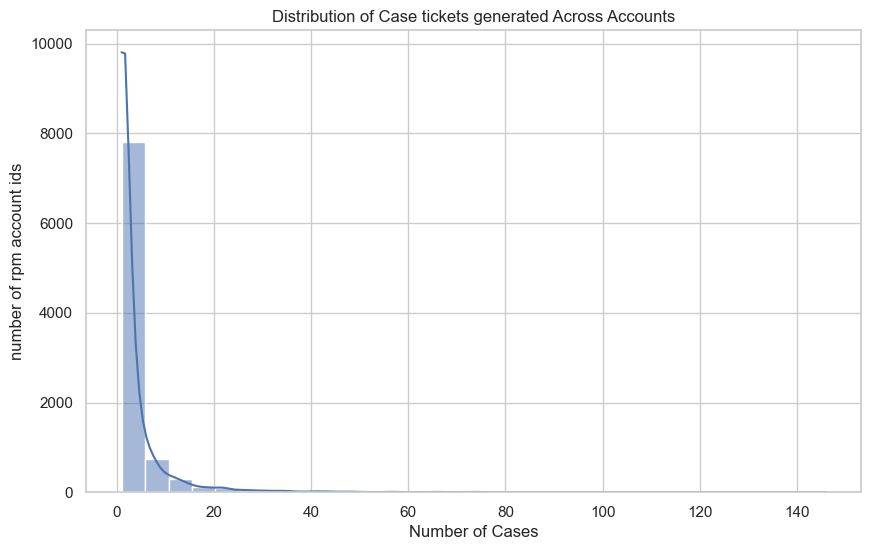

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")
number_of_bins = 30
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=accounts_sorted_by_cases, x='CASE_COUNT', bins=number_of_bins, kde=True)

# Customize the plot
plt.title('Distribution of Case tickets generated Across Accounts')
plt.xlabel('Number of Cases')
plt.ylabel('number of rpm account ids')
plt.grid(True)
plt.show()

In [89]:
# Calculate bins and frequencies
counts, bin_edges = np.histogram(accounts_sorted_by_cases['CASE_COUNT'], bins=number_of_bins)

# Create a DataFrame with bins and frequencies
histogram_table = pd.DataFrame({
    'Bin Start': bin_edges[:-1],
    'Bin End': bin_edges[1:],
    'Frequency': counts
})

print(histogram_table)

     Bin Start     Bin End  Frequency
0     1.000000    5.833333       7810
1     5.833333   10.666667        744
2    10.666667   15.500000        285
3    15.500000   20.333333        115
4    20.333333   25.166667         88
5    25.166667   30.000000         37
6    30.000000   34.833333         34
7    34.833333   39.666667         18
8    39.666667   44.500000         21
9    44.500000   49.333333         10
10   49.333333   54.166667          6
11   54.166667   59.000000          8
12   59.000000   63.833333          5
13   63.833333   68.666667          5
14   68.666667   73.500000          6
15   73.500000   78.333333          4
16   78.333333   83.166667          1
17   83.166667   88.000000          1
18   88.000000   92.833333          2
19   92.833333   97.666667          0
20   97.666667  102.500000          0
21  102.500000  107.333333          0
22  107.333333  112.166667          1
23  112.166667  117.000000          0
24  117.000000  121.833333          0
25  121.8333

### Summary so far
#### over 9.2K rpm account ids
#### most of the accounts (~7.8k) have generated 1-6 tickets
#### priority categories - ['P3', 'P2', 'P1', 'P4', 'None']
#### severity categories - ['Normal', 'High', 'Critical', 'Low']

In [132]:
df_cleaned = df.drop_duplicates()

In [135]:
df_cleaned['EFFECTIVE_ACR'] = df_cleaned.EFFECTIVE_ACR.astype(float)
# df_cleaned['PROVISIONED_FULL_USERS_COUNT'] = df_cleaned.PROVISIONED_FULL_USERS_COUNT.astype(float)


In [136]:
df_cleaned.dtypes

SUBSCRIPTION_ACCOUNT_ID     object
SFDC_ACCOUNT_NAME           object
SALES_HIER_GEO              object
INDUSTRY_GROUP              object
BUYING_PROGRAM              object
EFFECTIVE_ACR              float64
dtype: object

In [11]:
# df_cleaned.to_csv('peer_raw_data.csv')

In [137]:
df_cleaned.head()

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
0,3262815,Avenu,Growth,Technology,PAYG + Core,0.0
1,2190262,PT. Goto GoJek Tokopedia,APJ,Technology,Savings Plan,6579000.0
2,3264083,"ProxyPics, Inc",Growth,Technology,PAYG + Core,0.0
3,3262570,Account 3262570,Growth,Other,PAYG + Core,0.0
4,3036333,Nextup.ai,Growth,Technology,PAYG + Core,0.0


In [138]:
df_cleaned[ df_cleaned.T.isnull().any() ]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
2466,4742966,Line5,None,Other,PAYG + Core,0.0
2467,4270874,Fewo Cloud,None,Other,PAYG + Core,0.0
2468,6434487,Account 6434487,None,Other,PAYG + Core,0.0
2475,6437251,Account 6437251,None,Other,PAYG + Core,0.0
2476,4546846,Account 4546846,None,Other,PAYG + Core,0.0
...,...,...,...,...,...,...
19717,4450432,DPI Corp,None,Other,PAYG + Core,0.0
19718,6333255,Lae Sante,None,Other,PAYG + Core,0.0
19729,6437516,Studio 88,None,Other,PAYG + Core,0.0
19730,4131243,Account 4131243,None,Other,PAYG + Core,0.0


In [139]:
for col in df_cleaned.columns:
   print(f'Nulls in {col} is {df_cleaned[col].isnull().sum()}')

Nulls in SUBSCRIPTION_ACCOUNT_ID is 0
Nulls in SFDC_ACCOUNT_NAME is 0
Nulls in SALES_HIER_GEO is 62
Nulls in INDUSTRY_GROUP is 0
Nulls in BUYING_PROGRAM is 3
Nulls in EFFECTIVE_ACR is 0


<Axes: xlabel='INDUSTRY_GROUP'>

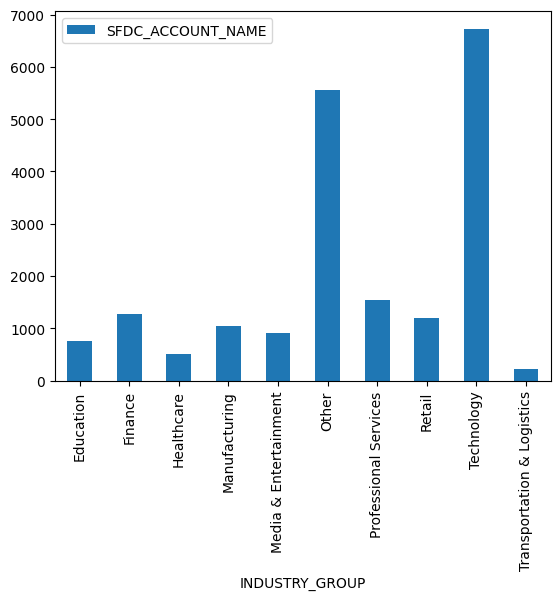

In [140]:
industry = df_cleaned.groupby(by=['INDUSTRY_GROUP']).agg({'SFDC_ACCOUNT_NAME':'count'}).reset_index()
industry.plot(kind = 'bar', x = 'INDUSTRY_GROUP', y = 'SFDC_ACCOUNT_NAME')

<Axes: xlabel='SALES_HIER_GEO'>

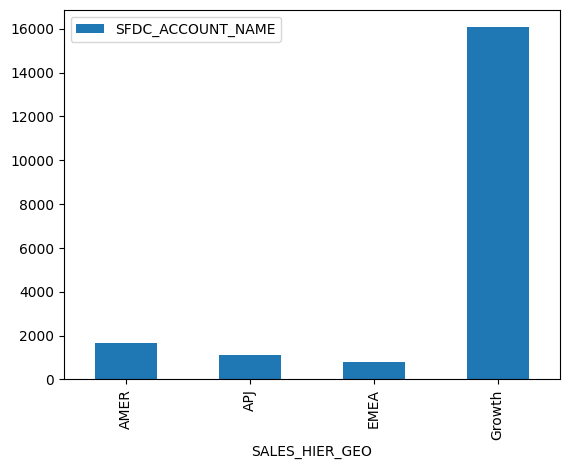

In [141]:
geo = df_cleaned.groupby(by=['SALES_HIER_GEO']).agg({'SFDC_ACCOUNT_NAME':'count'}).reset_index()
geo.plot(kind = 'bar', x = 'SALES_HIER_GEO', y = 'SFDC_ACCOUNT_NAME')

<Axes: xlabel='BUYING_PROGRAM'>

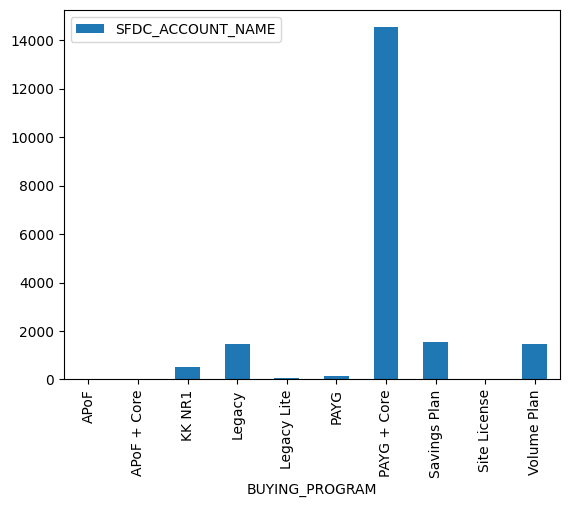

In [142]:
buy_program = df_cleaned.groupby(by=['BUYING_PROGRAM']).agg({'SFDC_ACCOUNT_NAME':'count'}).reset_index()
buy_program.plot(kind = 'bar', x = 'BUYING_PROGRAM', y = 'SFDC_ACCOUNT_NAME')

In [143]:
df_cleaned['EFFECTIVE_ACR'].describe()

count    1.973900e+04
mean     4.540706e+04
std      4.159691e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+02
max      2.600000e+07
Name: EFFECTIVE_ACR, dtype: float64

<Axes: >

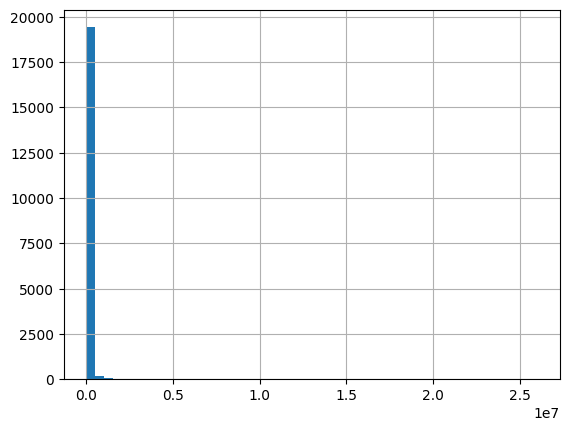

In [144]:
df_cleaned['EFFECTIVE_ACR'].hist(bins=50)

In [100]:
# df_cleaned['PROVISIONED_FULL_USERS_COUNT'].describe()

count    24106.000000
mean       111.278810
std        835.158223
min          0.000000
25%          1.000000
50%          2.000000
75%          8.000000
max      13658.000000
Name: PROVISIONED_FULL_USERS_COUNT, dtype: float64

<Axes: >

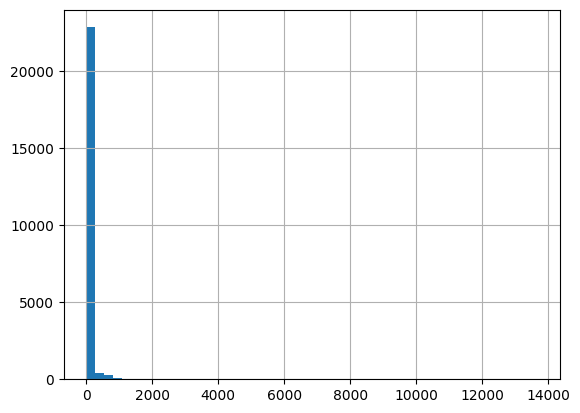

In [ ]:
# df_cleaned['PROVISIONED_FULL_USERS_COUNT'].hist(bins=50)

In [ ]:
# df_cleaned.sort_values(by = 'PROVISIONED_FULL_USERS_COUNT',ascending=False)

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR,PROVISIONED_FULL_USERS_COUNT
3100,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00,13658.0
21597,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00,13653.0
23895,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00,13645.0
20509,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00,13633.0
24685,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00,13625.0
...,...,...,...,...,...,...,...
24672,2561235,Payzone Bill Payments Ltd,EMEA,Professional Services,PAYG + Core,0.00,NaN
24675,2967745,Adorama Inc.,Growth,Other,Savings Plan,127680.00,NaN
24676,1438019,Malabar Gold & Diamonds.,APJ,Other,PAYG + Core,0.00,NaN
24730,5989715,8848 Digital,Growth,Other,PAYG + Core,0.00,NaN


In [ ]:
# df_cleaned[ df_cleaned['PROVISIONED_FULL_USERS_COUNT'].isnull() ].sort_values(by = 'EFFECTIVE_ACR', ascending= False)

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR,PROVISIONED_FULL_USERS_COUNT
21505,CC-0000326464,"Genesys Telecommunications Laboratories, Inc.",AMER,Technology,Savings Plan,26000000.0,NaN
9159,CC-0000622384,Adobe Systems Incorporated - Master,AMER,Technology,Savings Plan,12025000.0,NaN
7410,CC-0000297694,Verizon Communications Inc,AMER,Technology,Volume Plan,11700000.0,NaN
12325,CC-0000962881,Volkswagen User/Account Management Partnership...,EMEA,Other,Savings Plan,11326218.0,NaN
12306,CC-0000336961,"Cox Enterprises, Inc.",AMER,Technology,Volume Plan,9850000.0,NaN
...,...,...,...,...,...,...,...
9962,3652579,Endeavour Group B.V.,Growth,Media & Entertainment,PAYG + Core,0.0,NaN
10001,4229079,Onnuri Store,Growth,Other,PAYG + Core,0.0,NaN
10022,4153218,Delta8 Minds,Growth,Retail,PAYG + Core,0.0,NaN
10053,4414786,TimeBucks,Growth,Technology,PAYG + Core,0.0,NaN


# Using K MEANS

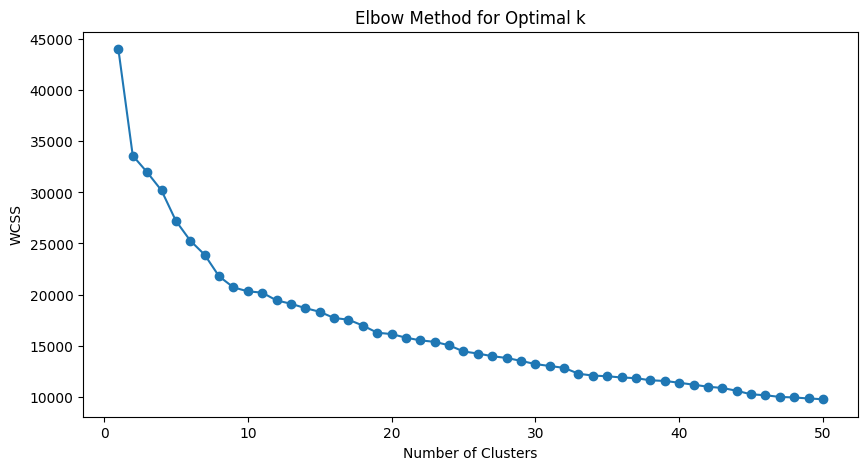

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

class PeerListModel:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def preprocess_data(self):
        # Select relevant columns
        categorical_cols = ['SALES_HIER_GEO','INDUSTRY', 'BUYING_PROGRAM', 'ACR_BIN', 'FULL_USER_BIN']
        
        # Separate account_id from features
        self.account_names = self.df['SFDC_ACCOUNT_NAME']
        self.df_categorical = self.df[categorical_cols]

        # One-hot encode categorical data
        encoder = OneHotEncoder()
        self.data_encoded = encoder.fit_transform(self.df_categorical)

    def determine_optimal_clusters(self, max_k=10):
        """Determine the optimal number of clusters using the Elbow Method."""
        wcss = []
        for k in range(1, max_k + 1):
            model = KMeans(n_clusters=k, random_state=42)
            model.fit(self.data_encoded)
            wcss.append(model.inertia_)
        
        # Plot the elbow graph
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, max_k + 1), wcss, marker='o')
        plt.title('Elbow Method for Optimal k')
        plt.xlabel('Number of Clusters')
        plt.ylabel('WCSS')
        plt.show()

    def train_model(self, n_clusters):
        """Train the KMeans model with the optimal number of clusters."""
        self.model = KMeans(n_clusters=n_clusters, random_state=42)
        self.model.fit(self.data_encoded)
        self.df['cluster'] = self.model.labels_
        

    def generate_peer_df(self):
        """Return a DataFrame where each account_id is associated with its peers."""
        # peer_list = self.df.copy()
        # peer_list['peers'] = peer_list.groupby('cluster')['SFDC_ACCOUNT_NAME'].transform(lambda x: ', '.join(x[x != x.name]))
        # return peer_list[['SFDC_ACCOUNT_NAME', 'peers']]
        return self.df

# Usage
if __name__ == "__main__":
    # Example data including 'account_id'
    

    # Initialize and preprocess data
    peer_model = PeerListModel(df_cleaned)
    peer_model.preprocess_data()

    # Determine optimal clusters
    peer_model.determine_optimal_clusters(max_k=50)
    
    

In [20]:
# Assuming after visual inspection you determine optimum k, let's say it's 3 for this example
optimal_k = 12
peer_model.train_model(n_clusters=optimal_k)

# Generate and print peer list DataFrame
peers_df = peer_model.generate_peer_df()
# print(peers_df)

In [21]:
peers_df.to_csv('Kmeans_12_peerset.csv')

# Using KNN

In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

class AccountPeerRecommender:

    def __init__(self, account_data: pd.DataFrame):
        self.account_data = account_data
        self.encoder = OneHotEncoder()
        self.scaler = RobustScaler()
        self.account_names = account_data['SFDC_ACCOUNT_NAME']
        self.features = None


        self.distances = None
        self.indices = None

    def prepare_data(self):
        """Prepare both categorical and numeric data."""
        categorical_cols = ['SALES_HIER_GEO', 'INDUSTRY_GROUP', 'BUYING_PROGRAM']
        numeric_cols = ['EFFECTIVE_ACR']
        
        # Encode categorical features
        categorical_data = self.encoder.fit_transform(self.account_data[categorical_cols])
        
        # Scale numeric features
        numeric_data = self.scaler.fit_transform(self.account_data[numeric_cols])
        categorical_data = categorical_data.toarray()
        
        # Combine the processed features
        self.features = np.hstack((numeric_data,categorical_data))

        return self.features,numeric_data, categorical_data

    def recommend_peers(self, num_peers=5):
        """Recommend top peers for each account."""
        if self.features is None:
            raise ValueError("Features are not prepared. Call prepare_data() first.")

        # Initialize and fit the nearest neighbors model
        neighbors_model = NearestNeighbors(n_neighbors=num_peers + 1, algorithm='auto', metric='nan_euclidean').fit(self.features)
        distances, indices = neighbors_model.kneighbors(self.features)


        return distances,indices

        # Construct peer recommendations, excluding the account itself
        # peer_recommendations = [
        #     (account, self.account_names.iloc[indices[i][1:num_peers + 1]].tolist()) 
        #     for i, account in enumerate(self.account_names)
        # ]

        # return pd.DataFrame(peer_recommendations, columns=['account_name', 'recommended_peers'])
        

# Usage
if __name__ == "__main__":
   

    # Initialize and preprocess data
    recommender = AccountPeerRecommender(df_cleaned)
    num_date, cat_data, feat = recommender.prepare_data()
    # peers_df = recommender.recommend_peers(num_peers=5)
    d, i = recommender.recommend_peers(num_peers=20)
    # print(peers_df)


In [156]:
i

array([[ 9389,  9277,  9311, ...,  9384,  9415,  9298],
       [    1, 17996,   650, ...,  9971, 12109, 15136],
       [ 9389,  9277,  9311, ...,  9384,  9415,  9298],
       ...,
       [19736, 19737, 18720, ...,  2211,  6889,  8152],
       [19737, 18720, 19736, ..., 14492,  4381,  8152],
       [19738,  5153, 11787, ..., 19465,  2228, 18931]])

In [159]:
df_cleaned[ df_cleaned['SFDC_ACCOUNT_NAME'] == 'Acima Credit, LLC']

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
17431,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,263130.66


In [160]:
peer_idx = []
for idx in i[17431].tolist():
    peer_idx.append(idx)
    df_temp = df_cleaned.iloc[peer_idx]

In [161]:
df_temp

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
17431,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,263130.66
10763,3694342,Adept,AMER,Technology,Savings Plan,263141.00
17447,1898311,Vector Limited,APJ,Other,Savings Plan,263040.00
12348,224747,Arnold Clark Automobiles Ltd.,EMEA,Manufacturing,Savings Plan,263400.00
544,410429,Tray Commerce,AMER,Technology,Savings Plan,264000.00
16442,1180790,"Plume Design, Inc.",AMER,Technology,Savings Plan,262000.00
1567,2826932,Luxury Escapes,APJ,Other,Savings Plan,262000.00
7850,3086065,Edmunds.com,AMER,Other,Savings Plan,264480.00
19421,2087528,"Komodo Health, Inc.",AMER,Technology,Volume Plan,265000.08
11480,156811,"CYBOZU, INC.",APJ,Technology,KK NR1,260184.55


In [186]:
# output from adhoc
Sql_list = ['Acima Credit, LLC','AON PLC', 'AQR Capital Management, LLC' , 'Above Lending' , 'Albert Corporation', 'Alliant Credit Union']

In [187]:
df_cleaned[df_cleaned['SFDC_ACCOUNT_NAME'].isin(Sql_list)]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
627,1788752,"AQR Capital Management, LLC",AMER,Finance,Savings Plan,479000.00
9482,3289153,Above Lending,AMER,Finance,Savings Plan,175000.00
9674,2252749,Albert Corporation,AMER,Finance,Volume Plan,428040.00
11777,663988,AON PLC,AMER,Finance,Savings Plan,256724.67
14673,1116172,Alliant Credit Union,AMER,Finance,Savings Plan,100716.00
17431,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,263130.66


In [183]:
d[17431]

array([ 0.        ,  1.41589258,  2.08932988,  2.68778335,  5.96564995,
        7.66925184,  7.79855267,  9.10608694, 12.62225748, 19.79288776,
       20.29438985, 20.91227361, 20.91892502, 20.91892502, 20.91892502,
       20.96667412, 22.04451299, 31.6010858 , 33.88725581, 36.47048016,
       38.78932822])

In [174]:
df_cleaned[ df_cleaned['SFDC_ACCOUNT_NAME'] == 'Mercadolibre Inc']

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
431,1709707,Mercadolibre Inc,AMER,Media & Entertainment,Savings Plan,24000000.0


In [175]:
peer_idx = []
for idx in i[431].tolist():
    peer_idx.append(idx)
    df_temp2= df_cleaned.iloc[peer_idx]

In [176]:
df_temp2

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY_GROUP,BUYING_PROGRAM,EFFECTIVE_ACR
431,1709707,Mercadolibre Inc,AMER,Media & Entertainment,Savings Plan,24000000.00
436,CC-0000326464,"Genesys Telecommunications Laboratories, Inc.",AMER,Technology,Savings Plan,26000000.00
18215,1356230,Capital One,AMER,Finance,Savings Plan,14880000.00
10217,1418997,Multimedia LLC [Chaturbate],AMER,Technology,Savings Plan,12333333.33
2576,CC-0000622384,Adobe Systems Incorporated - Master,AMER,Technology,Savings Plan,12025000.00
7278,CC-0000297694,Verizon Communications Inc,AMER,Technology,Volume Plan,11700000.00
6950,CC-0000962881,Volkswagen User/Account Management Partnership...,EMEA,Other,Savings Plan,11326218.00
335,CC-0000336961,"Cox Enterprises, Inc.",AMER,Technology,Volume Plan,9850000.00
9410,2681605,"Aruba Networks, Inc.",AMER,Technology,Savings Plan,8415000.00
17762,423892,"Credit Karma, Inc.",AMER,Other,Savings Plan,7500000.00


In [178]:
d[431]

array([     0.        ,  13333.33340833,  60800.00001645,  77777.77781286,
        79833.33334586,  82000.00002439,  84491.88002367,  94333.33335453,
       103900.00000962, 110000.00000909, 116140.00001722, 116466.66666667,
       119500.00000837, 120000.        , 122360.00001635, 122830.00000814,
       123333.33334144, 126280.00001584, 126666.66667456, 128521.28000778,
       130000.        ])

In [150]:
# peers_df.to_csv('knn_top5_Normalized.csv')

In [ ]:
# ,Swiggy,"['Asurion LLC', 'Appen', 'NSUSLAB Korea LLC', 'Immutable', 'Billionbrains Garage Ventures Pvt Ltd (Groww.in)']"

In [42]:
# df_cleaned[df_cleaned['SFDC_ACCOUNT_NAME'].isin(['Swiggy','Asurion LLC', 'Appen', 'NSUSLAB Korea LLC', 'Immutable', 'Billionbrains Garage Ventures Pvt Ltd (Groww.in)'])]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY,BUYING_PROGRAM,ACR_BIN,FULL_USER_BIN
5671,1285769,Appen,APJ,Technology,Savings Plan,500k-1M,10-100
8976,3530377,NSUSLAB Korea LLC,APJ,Technology,Savings Plan,500k-1M,10-100
16294,2592295,Billionbrains Garage Ventures Pvt Ltd (Groww.in),APJ,Technology,Savings Plan,500k-1M,10-100
17985,3157125,Asurion LLC,APJ,Technology,Savings Plan,500k-1M,10-100
18101,737486,Swiggy,APJ,Technology,Savings Plan,500k-1M,10-100
19703,3042557,Immutable,APJ,Technology,Savings Plan,500k-1M,10-100


In [53]:
# notmalize acr bin, full user 
# add actual acr value 

SyntaxError: invalid syntax (3698818973.py, line 1)

In [46]:
# df_cleaned.groupby('INDUSTRY').agg({'SFDC_ACCOUNT_NAME':'count'}).sort_values(by='SFDC_ACCOUNT_NAME')

,SFDC_ACCOUNT_NAME
INDUSTRY,
Chemicals & Related Products,1
"Electricity, Oil & Gas",1
Museums & Art Galleries,1
"Multimedia, Games & Graphics Software",1
Movie Theaters,1
...,...
Finance,1027
Business Services,1112
"Technology, Information & Media",1127


In [50]:
# df_cleaned.groupby('FULL_USER_BIN').agg({'SFDC_ACCOUNT_NAME':'count'}).sort_values(by='SFDC_ACCOUNT_NAME')

,SFDC_ACCOUNT_NAME
FULL_USER_BIN,
500-1000,35
100-500,211
1000+,559
10-100,1606
<=10,17649


In [47]:
# df_cleaned[ df_cleaned['INDUSTRY'] == 'Electricity, Oil & Gas' ]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY,BUYING_PROGRAM,ACR_BIN,FULL_USER_BIN
6281,1421922,ekWateur,Growth,"Electricity, Oil & Gas",PAYG + Core,<=5k,<=10


In [51]:
# df_cleaned[ df_cleaned['FULL_USER_BIN'] == '500-1000' ]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY,BUYING_PROGRAM,ACR_BIN,FULL_USER_BIN
2964,35894,"Morningstar, Inc.",AMER,Finance,Savings Plan,1M+,500-1000
3000,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,100k-500k,500-1000
3108,3331251,"CDK Global, Inc.",AMER,Technology,Savings Plan,1M+,500-1000
3109,829069,Revolut Ltd,EMEA,Finance,Savings Plan,1M+,500-1000
3187,3893793,BlackLine Inc.,AMER,Technology,Savings Plan,1M+,500-1000
5077,CC-0001711597,E.ON SE (Customer POA) Partnership Owner,EMEA,Utilities,Savings Plan,1M+,500-1000
5493,3117593,Skyscanner Limited,EMEA,Technology,Savings Plan,1M+,500-1000
6374,2285910,Marks and Spencer Group Plc,EMEA,Retail,Savings Plan,1M+,500-1000
6377,2602088,Nationwide Mutual Insurance Company,AMER,Insurance,Savings Plan,1M+,500-1000
7327,3347059,Citrix (Customer POA) Partnership Owner,AMER,Technology,Savings Plan,100k-500k,500-1000


In [48]:
# 'ekWateur','Iconic Group', 'Ingot Global LLC. t. d.', 'Account 3869936', 'Hang', 'YouDo'

NameError: name 'ekWateur' is not defined

In [52]:
# df_cleaned[df_cleaned['SFDC_ACCOUNT_NAME'].isin(['Acima Credit, LLC','Covius', 'Mobile Data Labs, Inc.', 'VINDI Tecnologia e Marketing LTDA.', 'Nacional Monte de Piedad, I.A.P.', 'Whatcom Educational Credit Union'])]

,SUBSCRIPTION_ACCOUNT_ID,SFDC_ACCOUNT_NAME,SALES_HIER_GEO,INDUSTRY,BUYING_PROGRAM,ACR_BIN,FULL_USER_BIN
823,936724,Whatcom Educational Credit Union,AMER,Finance,Savings Plan,100k-500k,10-100
3000,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,100k-500k,500-1000
8076,1821312,"Nacional Monte de Piedad, I.A.P.",AMER,Finance,Savings Plan,100k-500k,10-100
10616,3493733,"Nacional Monte de Piedad, I.A.P.",AMER,Finance,PAYG + Core,<=5k,<=10
11474,528800,"Acima Credit, LLC",AMER,Finance,Savings Plan,100k-500k,10-100
11927,1154208,VINDI Tecnologia e Marketing LTDA.,AMER,Finance,Savings Plan,100k-500k,10-100
16387,3296621,Covius,AMER,Finance,Savings Plan,100k-500k,10-100
17051,1651405,"Mobile Data Labs, Inc.",AMER,Finance,Savings Plan,100k-500k,10-100


In [ ]:
# 'Acima Credit, LLC','Covius', 'Mobile Data Labs, Inc.', 'VINDI Tecnologia e Marketing LTDA.', 'Nacional Monte de Piedad, I.A.P.', 'Whatcom Educational Credit Union'